(0, 0, 0)


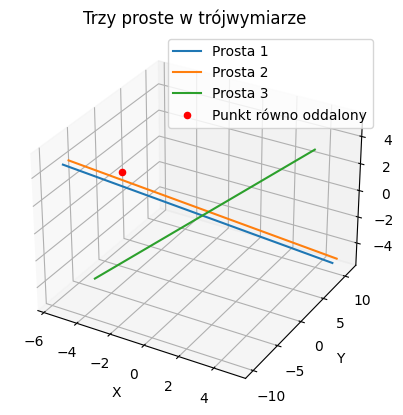

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Definicja równań prostych
def line1(t):
    x = t
    y = 2*t
    z = -t
    return x, y, z

def line2(t):
    x = t
    y = 2*t + 1
    z = -t
    return x, y, z

def line3(t):
    x = t
    y = t
    z = t
    return x, y, z

# Funkcja obliczająca odległość punktu od prostych
def distance_from_lines(point, *args):
    x, y, z = point
    line1, line2, line3 = args

    distance1 = np.sqrt((x - line1[0])**2 + (y - line1[1])**2 + (z - line1[2])**2)
    distance2 = np.sqrt((x - line2[0])**2 + (y - line2[1])**2 + (z - line2[2])**2)
    distance3 = np.sqrt((x - line3[0])**2 + (y - line3[1])**2 + (z - line3[2])**2)

    return abs(distance1 - distance2) + abs(distance1 - distance3) + abs(distance2 - distance3)

# Początkowe przybliżenie punktu
initial_point = [0, 0, 0]

# Obliczenie punktu równo oddalonego od prostych
result = minimize(distance_from_lines, initial_point, args=(line1(1), line2(1), line3(1)))

# Odczytanie znalezionego punktu
equidistant_point = result.x

# Tworzenie danych dla linii
t1 = np.linspace(-5, 5, 100)
t2 = np.linspace(-5, 5, 100)
x1, y1, z1 = line1(t1)
x2, y2, z2 = line2(t2)
x3, y3, z3 = line3(t2)

# Tworzenie wykresu 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Wyświetlanie prostych
ax.plot(x1, y1, z1, label='Prosta 1')
ax.plot(x2, y2, z2, label='Prosta 2')
ax.plot(x3, y3, z3, label='Prosta 3')

# Wyświetlanie punktu równo oddalonego
ax.scatter(*equidistant_point, color='red', label='Punkt równo oddalony')
print(line1(1))
# Dodanie etykiet i tytułu
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trzy proste w trójwymiarze')

# Dodanie legendy
ax.legend()

# Wyświetlenie wykresu
plt.show()
